In [856]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [857]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [858]:
path = '/content/drive/MyDrive/data_titanic/train.csv'

df_train = pd.read_csv(path)

In [859]:
path1 = '/content/drive/MyDrive/data_titanic/test.csv'

df_test = pd.read_csv(path1)

In [860]:
path2='/content/drive/MyDrive/data_titanic/sample_submission.csv'
df_acc=pd.read_csv(path2)

In [861]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [862]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [863]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [864]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [865]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [866]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [867]:
df_num = df_train[['Age','SibSp','Parch','Fare']]

In [868]:
pd.pivot_table(df_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


more younger people survived

higher fare people survived more

children with parents survived more

In [869]:
pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')


Sex,female,male
Survived,,
0,81,468
1,233,109


more women survived

In [870]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [871]:
pd.pivot_table(df_train, index = 'Survived', columns = 'Parch', values = 'Ticket' ,aggfunc ='count')


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [872]:
pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


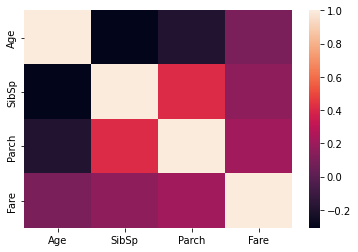

In [873]:
sns.heatmap(df_num.corr())

Parch and Sibsp have high correlations

In [874]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [875]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [876]:
df = [df_train, df_test]
for data in df:
    data['Embarked'] = data['Embarked'].fillna('S')


In [877]:
age_mean=df_train['Age'].mean()
df_train['Age'].replace(np.nan,age_mean, inplace=True)

In [878]:
age_mean1=df_test['Age'].mean()
df_test['Age'].replace(np.nan,age_mean, inplace=True)


In [879]:
fare_mean=df_test['Fare'].mean()
df_test['Fare'].replace(np.nan,fare_mean, inplace=True)

In [880]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [881]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [882]:
df = [df_train, df_test]

for data in df:
    data['Fare'] = data['Fare'].astype(int)
    data['Age'] = data['Age'].astype(int)

In [883]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [884]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    object
 3   Sex       891 non-null    object
 4   Age       891 non-null    int64 
 5   SibSp     891 non-null    int64 
 6   Parch     891 non-null    int64 
 7   Fare      891 non-null    int64 
 8   Embarked  891 non-null    object
dtypes: int64(6), object(3)
memory usage: 62.8+ KB


In [885]:
df = [df_train, df_test]
for data in df:
    data['Family'] = data['SibSp'] + data['Parch']
    data.loc[data['Family'] > 0, 'NotAlone'] = 1
    data.loc[data['Family'] == 0, 'NotAlone'] = 0
    data['NotAlone'] = data['NotAlone'].astype(int)
df_train['NotAlone'].value_counts()

0    537
1    354
Name: NotAlone, dtype: int64

In [886]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,NotAlone
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S,0,0
5,0,3,"Moran, Mr. James",male,29,0,0,8,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51,S,0,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21,S,4,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11,S,2,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30,C,1,1


In [887]:
sex = {"male": 0, "female": 1 }
df_train['Sex'] = df_train['Sex'].map(sex)
df_test['Sex'] = df_test['Sex'].map(sex)

In [888]:
embarked = {"S": 0, "C": 1, "Q": 2}
df_train['Embarked'] = df_train['Embarked'].map(embarked)
df_test['Embarked'] = df_test['Embarked'].map(embarked)

In [889]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,NotAlone
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,1,1
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,0,0
5,0,3,"Moran, Mr. James",0,29,0,0,8,2,0,0
6,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,51,0,0,0
7,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,21,0,4,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,11,0,2,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,30,1,1,1


In [890]:
df_train['Title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Lady              1
Ms                1
Jonkheer          1
Mme               1
the Countess      1
Don               1
Sir               1
Name: Title, dtype: int64

In [891]:
df_test['Title'] = df_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [892]:
df = [df_train, df_test]
title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for data in df:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].map(title)
    data['Title'] = data['Title'].fillna(0)
    data['Title'] = data['Title'].astype(int)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [893]:
pd.pivot_table(df_train, index = 'Title', values = ['Survived'])

,Survived
Title,
0,1.000000
1,0.156673
2,0.702703
3,0.793651
4,0.575000
5,0.318182


In [894]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,NotAlone,Title
0,0,3,0,22,1,0,7,0,1,1,1
1,1,1,1,38,1,0,71,1,1,1,3
2,1,3,1,26,0,0,7,0,0,0,2
3,1,1,1,35,1,0,53,0,1,1,3
4,0,3,0,35,0,0,8,0,0,0,1


In [895]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

In [896]:

X =X_train.copy()
X = X.to_numpy()

Y = Y_train.copy()
Y = Y.to_numpy()

**Logistic Regression**

In [897]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [898]:
def loss(y, y_h):
    loss = -np.mean(y*(np.log(y_h)) - (1-y)*np.log(1-y_h))
    return loss

In [899]:
def gradientd(X, y, y_h):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_h - y))
    db = (1/m)*np.sum((y_h - y)) 
    
    return dw, db

In [900]:
def train(X, y, batch_size, epochs, lr):
    m, n = X.shape
    
    w = np.zeros((n,1))
    b = 0
   
    y = y.reshape(m,1)

    losses = []
    for epoch in range(epochs):
        for i in range((m-1)//batch_size + 1):
            
           
            start_i = i*batch_size
            end_i = start_i + batch_size
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            
            y_h = sigmoid(np.dot(xb, w) + b)
            
          
            dw, db = gradientd(xb, yb, y_h)
          
            w -= lr*dw
            b -= lr*db
        
     
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
   
    return w, b, losses

In [901]:
def predict(X):
   
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [902]:
w, b, l = train(X, Y, batch_size=100, epochs=1000, lr=0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [903]:
prediction=predict(X)
print(prediction)

[0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

In [904]:
Xt =X_test.copy()
Xt = Xt.to_numpy()

In [905]:
predictionlr_test=predict(Xt)

In [906]:
Y_test=df_acc.drop("PassengerId", axis=1)

In [907]:
print(predictionlr_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [908]:
predictionlr_test=predictionlr_test.reshape(418,1)



In [909]:
print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_test - predictionlr_test)) * 100))

Test accuracy: Survived    84.92823
dtype: float64 %


**SVM**

In [910]:
class SVM:
    def __init__(self, lr=0.001, lamb=0.01, epoch=1000):
        self.lr = lr
        self.lamb = lamb
        self.epoch = epoch
        self.w = None
        self.b = None

    def fit(self, X, y):
        m,n = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epoch):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lamb * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lamb * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]
        return self.w, self.b
      
   

In [911]:
print(Y.shape)

(891,)


In [912]:
 def predict( X):
        pre = np.dot(X, w) - b
        return np.sign(pre)


In [913]:
svm = SVM()
w,b=svm.fit(X, Y)


In [914]:
pred_testsvm = predict(Xt)

In [915]:
def changezero(pred):
  for i in range(len(pred)):
    if pred[i] == -1:
        pred[i] = 0

In [916]:
changezero(pred_testsvm)
print(pred_testsvm)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.

In [917]:
pred_testsvm=pred_testsvm.reshape(418,1)

In [918]:
print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_test - pred_testsvm)) * 100))

Test accuracy: Survived    76.315789
dtype: float64 %
